<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/momentum_monthly_3_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


Dados com retornos mensais

In [2]:
periodo = '3y'
# carteira de small caps
small = pd.read_csv('https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Small.csv',
                    sep=';' , decimal=',' , thousands='.' , header=1 , skiprows=0 , skipfooter=2 , 
                    encoding='latin-1',index_col=False , engine='python')
lista = (small['Código']+'.SA').to_list()+['BOVA11.SA']

In [3]:
data = yf.download(lista,period=periodo)['Adj Close'].resample('M').last().pct_change()

[*********************100%%**********************]  116 of 116 completed


In [4]:
data.tail()

Ticker,AALR3.SA,ABCB4.SA,AESB3.SA,AGRO3.SA,ALOS3.SA,ALPA4.SA,ALUP11.SA,AMAR3.SA,AMBP3.SA,ANIM3.SA,...,UNIP6.SA,USIM5.SA,VAMO3.SA,VIVA3.SA,VLID3.SA,VULC3.SA,VVEO3.SA,WIZC3.SA,YDUQ3.SA,ZAMP3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-31,-0.187500,-0.010537,-0.075487,-0.076750,-0.075330,-0.152174,-0.076484,-0.295699,-0.154462,-0.015695,...,-0.082256,-0.010764,-0.188679,-0.013139,0.001463,0.019653,-0.275986,-0.081379,-0.140053,-0.126316
2024-02-29,0.005917,-0.010063,-0.083407,-0.038118,0.005703,0.185315,0.023368,-0.129771,0.075691,0.166287,...,-0.058614,0.204570,0.068543,-0.032544,-0.089625,-0.014346,-0.163366,-0.067568,0.056017,-0.162651
2024-03-31,0.078824,0.026260,-0.022988,0.035413,-0.031187,-0.062930,0.026192,-0.188596,0.055480,-0.042969,...,0.025152,-0.095754,-0.043528,-0.223242,-0.010701,-0.028352,-0.272189,0.165861,-0.110511,-0.187050
2024-04-30,0.112323,-0.044573,-0.064002,0.044788,-0.127090,-0.007345,-0.026190,-0.167568,-0.358974,-0.310204,...,-0.129139,-0.182536,-0.148503,-0.113170,-0.028616,-0.086028,-0.180488,-0.007734,-0.179907,0.138643
2024-05-31,0.027451,-0.037581,0.010560,0.002728,0.093084,0.078224,0.052802,-0.038961,0.003000,0.050296,...,-0.000947,0.012642,0.140647,0.045126,-0.020963,0.005054,-0.341284,-0.023055,-0.048663,-0.124352


In [5]:
def rolling_ret( df , m):
  '''
    df : dataframe com retornos 
    calcula retorno acumulado na janela de m periodos
  '''
  return (df+1).rolling(m).apply(np.prod) - 1 

def get_top( df , date , n=3):
  '''
    determina as colunas de df com os 3 maiores valores na data 'date'
  '''
  top = df.loc[date].nlargest(n).index
  return top.to_list()

def port_ret(df , date ,  port = None):
  '''
    calcula a média em 'df' dos retornos de 'port' na data 'date' 
  '''
  
  if port is None : port = get_top(data , date )

  porta = df.loc[date:,port]
  return porta.mean(axis=1).values[0]

In [19]:
date = '2024-03-31'
# quando rendeu em mar-24 as carteira com as 3 small mais rentáveis
print( date , get_top(data , date) , port_ret( rolling_ret(data,1) , date ))

2024-03-31 ['GUAR3.SA', 'STBP3.SA', 'POSI3.SA'] 0.3052403459615061


In [20]:
data.loc[date].nlargest(10)

Ticker
GUAR3.SA    0.383333
STBP3.SA    0.278320
POSI3.SA    0.254068
LAVV3.SA    0.210150
TRIS3.SA    0.189979
TEND3.SA    0.186864
RRRP3.SA    0.180322
RAPT4.SA    0.168937
WIZC3.SA    0.165861
PTBL3.SA    0.160267
Name: 2024-03-31 00:00:00, dtype: float64

### momentum

usando  retornos em janelas moveis

In [8]:
janela = 12
tam_carteira = 3

In [9]:
ret = rolling_ret(data,janela)
ret.tail()

Ticker,AALR3.SA,ABCB4.SA,AESB3.SA,AGRO3.SA,ALOS3.SA,ALPA4.SA,ALUP11.SA,AMAR3.SA,AMBP3.SA,ANIM3.SA,...,UNIP6.SA,USIM5.SA,VAMO3.SA,VIVA3.SA,VLID3.SA,VULC3.SA,VVEO3.SA,WIZC3.SA,YDUQ3.SA,ZAMP3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-31,-0.604956,0.366354,0.127723,-0.073910,NaN,-0.369581,0.133402,-0.620290,-0.358269,-0.006787,...,-0.146567,0.129530,-0.416411,0.404421,1.335609,0.832066,-0.466766,0.020192,0.889549,-0.086238
2024-02-29,-0.590361,0.430110,0.052419,0.023342,NaN,0.078473,0.203251,-0.276191,-0.186778,0.605016,...,-0.135289,0.699254,-0.313488,0.536157,1.211616,0.841649,-0.518665,0.003871,1.923748,-0.133056
2024-03-31,-0.592987,0.582775,0.026157,0.140479,NaN,0.169325,0.265544,-0.421875,-0.177661,0.952191,...,0.003390,0.439587,-0.346813,0.170006,1.040115,0.715368,-0.605301,0.331600,1.600643,-0.270968
2024-04-30,-0.553611,0.522175,-0.106070,0.188600,NaN,0.276653,0.111672,-0.511111,-0.454345,0.463204,...,-0.074329,0.136502,-0.392382,0.057038,0.812196,0.412744,-0.681632,0.314594,0.851727,-0.080952
2024-05-31,-0.544150,0.472014,-0.207883,0.265155,NaN,-0.022988,0.090888,-0.537500,-0.465047,0.187291,...,-0.117666,0.180380,-0.342925,-0.076061,0.306486,0.177151,-0.805816,0.203838,0.016654,-0.112861


#### próximo mês

In [10]:
date = ret.index[-1].date().strftime("%Y-%m-%d")
prox = ret.loc[date].nlargest(tam_carteira).index.values
print('proxima carteira: ' , *prox)

proxima carteira:  CEAB3.SA ENAT3.SA GUAR3.SA


In [11]:
carteiras = []
for date in ret.index:
    # print(date.date() , get_top( ret , date , tam_carteira), port_ret( data , date ,  get_top( ret , date) ))
    carteiras.append(get_top( ret , date , tam_carteira))

In [12]:
print(*carteiras)

['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['AALR3.SA', 'ABCB4.SA', 'AESB3.SA'] ['RECV3.SA', 'ENAT3.SA', 'AALR3.SA'] ['AALR3.SA', 'BEEF3.SA', 'RECV3.SA'] ['AALR3.SA', 'BEEF3.SA', 'KEPL3.SA'] ['CIEL3.SA', 'BEEF3.SA', 'KEPL3.SA'] ['CIEL3.SA', 'KEPL3.SA', 'MILS3.SA'] ['CIEL3.SA', 'MILS3.SA', 'RECV3.SA'] ['CIEL3.SA', 'RECV3.SA', 'KEPL3.SA'] ['CIEL3.SA', 'CURY3.SA', 'RECV3.SA'] ['CIEL3.SA', 'KEPL3.SA', 'CURY3.SA'] ['CIEL3.SA', 'MILS3.SA', 'CURY3.SA'] ['PLPL3.SA', 'CURY3.SA', 'CIEL3.SA'] ['PLPL3.SA', 'CURY3.SA', 'CIEL3.SA'] ['PLPL3.SA', 'CURY3.SA', 'ONCO3.SA'] ['PLPL3.SA', 'TEND3.SA', 'CURY3.SA'] ['PLPL3.SA', 'TEND3.SA', 'POMO4.SA'] [

In [13]:
## a carteira roda no mes seguinte
retornos = [0.0]
for i in range(1,len(data)): 
  # print(data.index[i].date() , carteiras[i-1] , port_ret( data , data.index[i] , carteiras[i-1] ))
  retornos.append(port_ret( data , data.index[i] , carteiras[i-1] ))

In [14]:
compara = pd.DataFrame({'returns' : retornos , 'ibov' : data['BOVA11.SA']} , index=data.index)
compara.ibov.iloc[0] = 0.0
# compara

<Axes: xlabel='Date'>

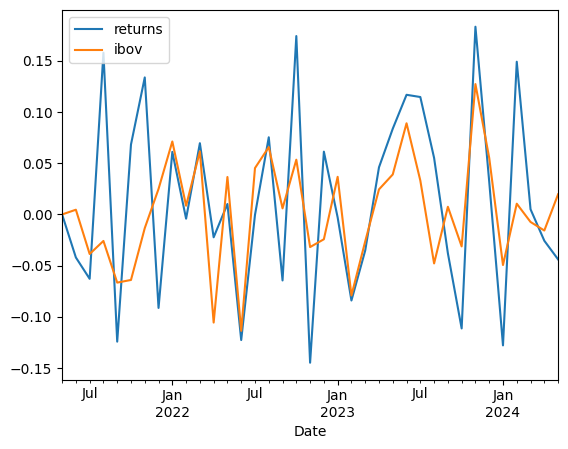

In [15]:
compara.plot()

In [16]:
compara['indice_acum'] = (compara.ibov+1.0).cumprod()
compara['cartei_acum'] = (compara.returns+1.0).cumprod()
compara.tail()

,returns,ibov,indice_acum,cartei_acum
Date,,,,
2024-01-31,-0.127822,-0.049390,1.022268,1.256984
2024-02-29,0.149087,0.010488,1.032990,1.444384
2024-03-31,0.005042,-0.007345,1.025402,1.451667
2024-04-30,-0.025668,-0.015684,1.009320,1.414406
2024-05-31,-0.043872,0.019693,1.029196,1.352354


<Axes: xlabel='Date'>

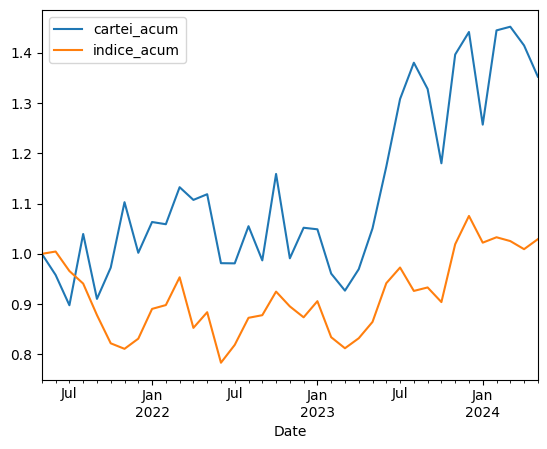

In [17]:
compara[['cartei_acum','indice_acum']].plot()